In [17]:
import numpy as np

# CIR 모델 파라미터 설정
r0 = 0.03  # 초기 이자율
kappa = 3.0 # 평균 회귀속도
theta = 0.02 # 장기 평균 이자율
sigma = 0.1 # 변동성
T = 1.0 # 시뮬레이션 기간 1년
N = 1000 # 시뮬레이션을 위한 시간 단계 수 (1년을 1000개로 쪼갬)
dt = T / N  # 시간 간격
n_simulations = 5  # 시뮬레이션 수

In [12]:
# 시뮬레이션 결과 저장할 배열 초기화
r = np.zeros((n_simulations, N+1))
r[:, 0] = r0

In [13]:
# 위너 과정 샘플링
np.random.seed(14)

# 위너 프로세스가 dt 동안 정규분포를 따르므로 평균이 0이고 분산이 dt인 정규 분포 안에서 샘플링
# 각 시간 단계 (time step)을 시뮬레이션 별로 쓰일거기 때문에 n_simulation x M 짜리 배열로 생성
dW = np.random.normal(0, np.sqrt(dt), (n_simulations,  N))

$$
r_{t + \Delta{t}} - r_t = \kappa(\theta - r_t)\Delta{t} + \sigma\sqrt{r_t}\Delta{W_t} 
$$

In [15]:
# 각 시간 단계별로 추정을 한다
for i in range(N):
    r[:, i+1] = r[:, i] + kappa * (theta - r[:, i]) * dt + sigma * np.sqrt(np.maximum(r[:, i], 0)) * dW[:, i]


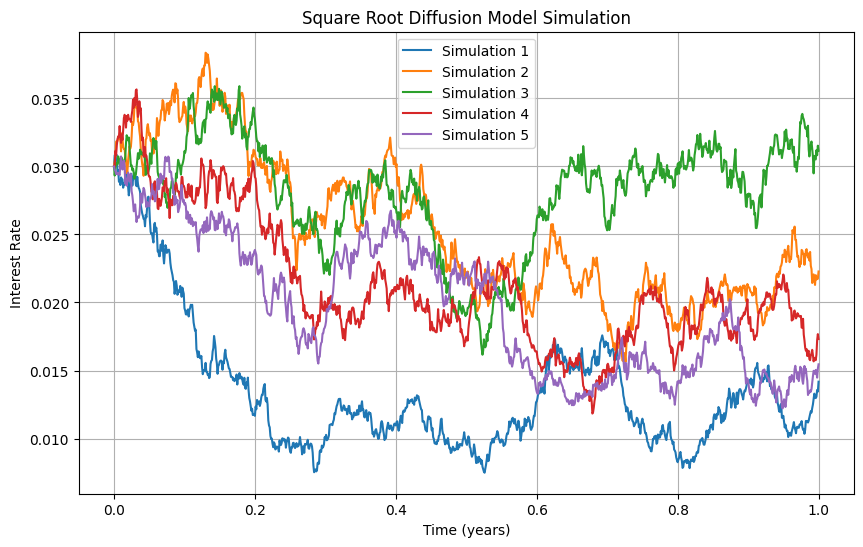

In [19]:
# 시뮬레이션 결과 시각화
time = np.linspace(0, T, N + 1)
plt.figure(figsize=(10, 6))
for j in range(n_simulations):
    plt.plot(time, r[j], label=f'Simulation {j+1}')

plt.title('Square Root Diffusion Model Simulation')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.legend()
plt.show()

시간에 따른 이자율 변화를 5개의 시뮬레이션을 돌려보면서 모델 파라미터 값을 수정해가면서 현재 시장에 맞게 반영을 하면 된다